In [1]:
import board
import busio
from adafruit_bno08x import (
    BNO_REPORT_ROTATION_VECTOR,
)
from adafruit_bno08x.i2c import BNO08X_I2C

import time
import numpy as np
from matplotlib import pyplot as plt

i2c = busio.I2C(board.SCL, board.SDA)
bno0 = BNO08X_I2C(i2c, address=0x4a)

bno0.enable_feature(BNO_REPORT_ROTATION_VECTOR)
# bno0.begin_calibration

def within_threshold(val1, val2):
    epsilon = 1e-12
    return abs(val2 - val1) < epsilon

i2c initilizing


In [2]:
time_after_loop = time.time() # initialization
frequency = 500
period = 1 / frequency

count = 0
seconds = 5

data = []
frequencys = []
times = []
last_value = 0
while count < seconds * frequency:
    time_before_loop = time.time() 

    if time_before_loop - time_after_loop >= period:
      real_frequency = time_before_loop - time_after_loop
      frequencys.append(real_frequency)

      time_after_loop = time.time()

      data_point = bno0.quaternion[0]
      if not within_threshold(data_point, last_value):
        data.append(data_point)
        times.append(time_after_loop)
        last_value = data_point
    
      count+=1

data = np.array(data)
frequencys = np.array(frequencys)
times = (np.array(times) - times[0])

Loop Frequency: 448.51523132448006
Sample Frequency: 187.3048723913409


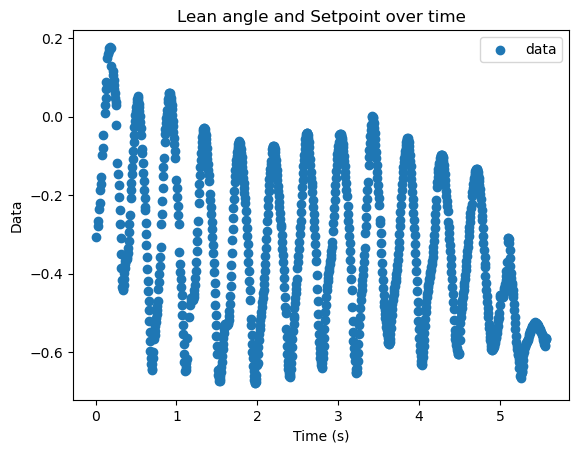

In [3]:
plt.figure()
plt.scatter(times, data)

plt.title("Lean angle and Setpoint over time")
plt.xlabel("Time (s)")
plt.ylabel("Data")
plt.legend(["data"])

#plt.xlim([2,3])

sample_frequency = 1 / np.average(times[1:-1] - times[0:-2])
print(f'Loop Frequency: {1 / np.average(frequencys)}')
print(f'Sample Frequency: {sample_frequency}')